# Iris
* [Analiz](#1)
* [Görselleştirme](#2)

<a id="1"></a> <br>
## Analiz

In [3]:
# kütüphanelerin import edilmesi
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
# veri setinin import edilip kullanıma hazır hale getirilmesi
iris = sns.load_dataset("iris")
df = iris.copy()

In [5]:
# veri setine ilk bakış
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Veri Setinin Hikayesi
**Iris çiçeklerinin türlerini ve boyutlarını ele alan veri seti**
* **sepal_length**: çanak yaprağı uzunluğu
* **sepal_width**: çanak yaprağı genişliği
* **petal_length**: taç yaprağı uzunluğu
* **petal_width**: taç yaprağı genişliği
* **species**: iris çiçeği türü

In [6]:
# veri setinin son 5 gözlemi
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [7]:
# veri setinin yapısal bilgileri
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


* DataFrame
* 150 gözlem var
* 5 adet değişkenden oluşuyor. (4 tane float, 1 tane object)
* 6.0+ KB yer kaplıyor

In [8]:
# veri setindeki değişkenlerin veri tipleri
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
# veri setindeki object veri tiplerinin category veri tiplerine dönüşümü
df.species = pd.Categorical(df.species)

In [10]:
# veri setindeki gözlem ve değişken sayısı
df.shape
print(f"Veri setindeki gözlem sayısı: {df.shape[0]}")
print(f"Veri setindeki değişken sayısı: {df.shape[1]}")

Veri setindeki gözlem sayısı: 150
Veri setindeki değişken sayısı: 5


In [11]:
# veri setindei değişken isimleri
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [12]:
# veri setindeki betimsel istatistikler
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5


* en uzun çanak yaprağa sahip çiçeğin uzunluğu 7.9 cm
* en kısa taç yaprağa sahip çiçeği genişliği 0.1 cm
* ortalama çanak yaprak genişliği 3.05 cm

In [13]:
# eksik değer var mı?
df.isnull().values.any()

False

In [14]:
# hangi değişkende kaçar tane eksik veri var
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

* eksik veri yok

In [15]:
# kategorik değişkenler
kat_df = df.select_dtypes(include = ["category"])
kat_df.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [16]:
# kategorik değişkenlerin sınıflarına erişmek
kat_df.species.unique()

[setosa, versicolor, virginica]
Categories (3, object): [setosa, versicolor, virginica]

In [17]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.species.value_counts().count()

3

In [18]:
# kategorik değişkenlerin sınıf sayısına erişmek
kat_df.species.value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

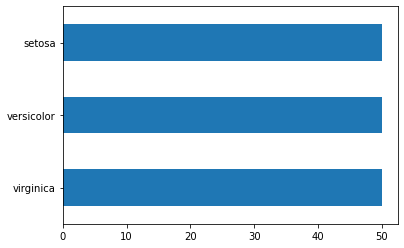

In [19]:
# kategorik değişkenlerin sınıf frekansını grafiğe dökmek
kat_df.species.value_counts().plot.barh();

In [20]:
# nümerik değişkenler
num_df = df.select_dtypes(include = ["float"])
num_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [21]:
# nümerik değişkenlerin betimsel istatistikleri
num_df.sepal_length.describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [35]:
# rapor
print(f"Ortalama çanak yaprak uzunluğu: {num_df.sepal_length.mean()}")
print(f"En büyük taç yaprak uzunluğu: {num_df.petal_length.max()}")
print(f"En küçük taç yaprak genişliği: {num_df.petal_width.min()}")

Ortalama çanak yaprak uzunluğu: 5.843333333333335
En büyük taç yaprak uzunluğu: 6.9
En küçük taç yaprak genişliği: 0.1


<a id="2"></a> <br>
## Görselleştirme

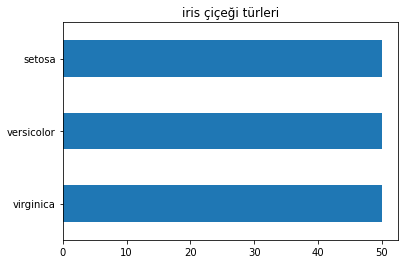

In [23]:
# kategorik değişkenin sınıflarının frekanslarını görselleştirmek
(df.species
 .value_counts()
 .plot.barh()
 .set_title("iris çiçeği türleri")
);

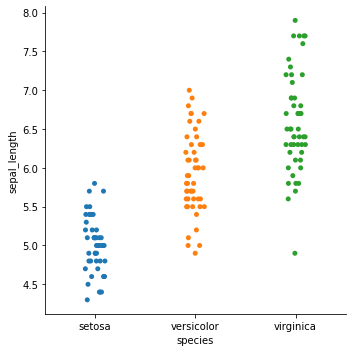

In [24]:
# veri setinde yer alan değişkenlerin birlikte değerlendirilmesi
sns.catplot(x = "species", y = "sepal_length", data = df);

* setosa türü iris çiçeğinin çanak yaprak uzunluğu diğer türlere göre daha kısa
* en uzun çanak yapraklara sahip çiçek türü virginica

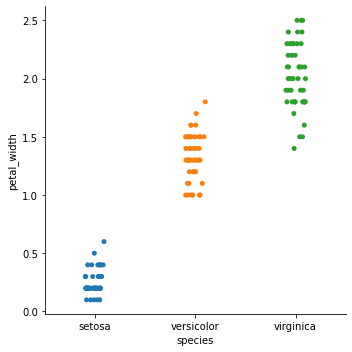

In [25]:
sns.catplot(x = "species", y = "petal_width", data = df);

* setosa türü iris çiçeğinin taç yaprak genişliği diğer türlere daha dar
* en geniş taç yapraklara sahip çiçek türü virginica

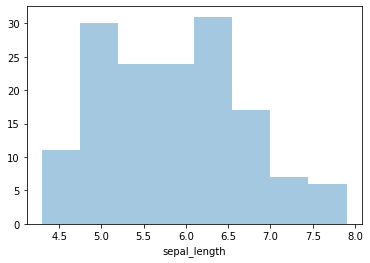

In [26]:
# nümerik değişkenin histogramı
sns.distplot(df.sepal_length, kde = False);

* çanak yaprak uzunluğu ortalaması 4.75 ve 6.5 arasında 

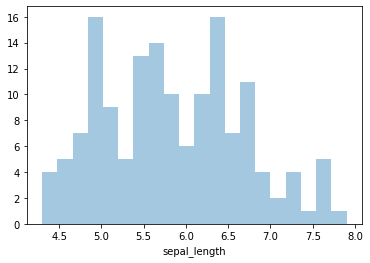

In [27]:
# nümerik değişkenin hassas histogramı
sns.distplot(df.sepal_length, bins = 20, kde = False);

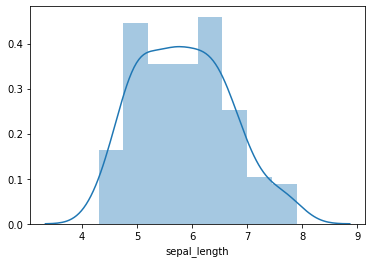

In [28]:
# histogram ve yoğunluk grafiği
sns.distplot(df.sepal_length);

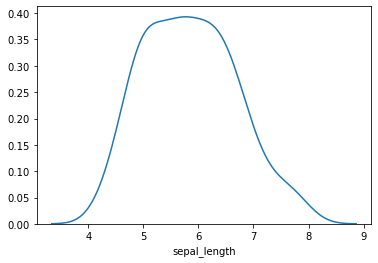

In [29]:
# yoğunluk grafiği
sns.distplot(df.sepal_length, hist = False);

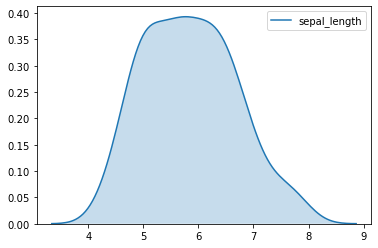

In [30]:
# karalı yoğunluk grafiği
sns.kdeplot(df.sepal_length, shade = True);

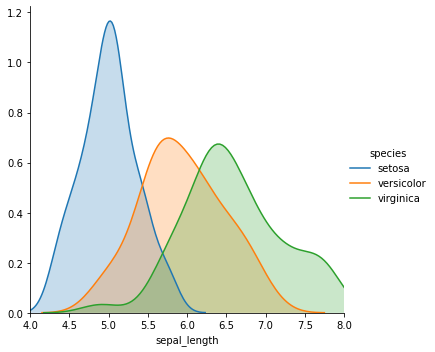

In [37]:
# grafiğe yakından ve daha detaylı bakmak
(sns
 .FacetGrid(df, 
            hue = "species", 
            height = 5, 
            xlim = (4,8))
 .map(sns.kdeplot, "sepal_length", shade = True)
 .add_legend()
);

* çanak yaprak uzunlukları setosadan virginica'ya gidildikçe artmış

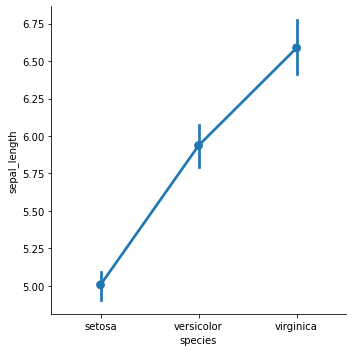

In [32]:
# noktalı üç boyutlu grafik
sns.catplot(x = "species", y = "sepal_length", kind = "point", data = df);

* çanak yaprak uzunluğu ortalaması setosada 5, versicolorda 6, virginicada 6.5

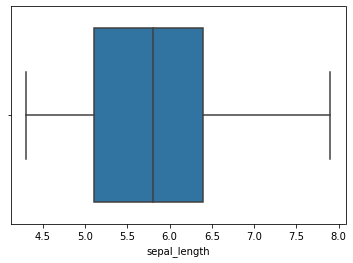

In [33]:
# kutu grafiği - yatay
sns.boxplot(x = df.sepal_length);

* veri setinde aykırı değer yok.

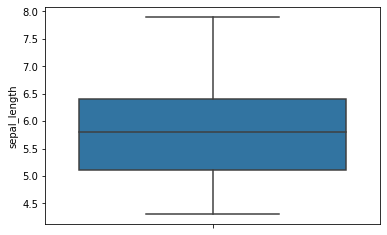

In [34]:
# kutu grafiği - dikey
sns.boxplot(x = df.sepal_length, orient = "v");